# ОИАД. Лабораторная работа №1

Используйте набор данных 'datasets/teen_phone_addiction_dataset.csv'. 

Возьмите столбец $N \% 7 $, где $N$ - номер в списке группы (см. ниже).

## I. 
Рассчитайте характеристики:
1. Среднее
2. Дисперсия
3. Мода
4. Медиана
5. Квантили уровня 0.25, 0.5, 0.75
6. Эксцесс
7. Ассиметрия
8. Интерквартильный размах

Построить графики:
1. Гистограмма
2. Эмпирическая функция распределения

## II. 
Проверить данные на нормальность, используя критерии:
1. Хи-квадрат (Реализовать самому, не используя библиотечные варианты!!)
2. Ассиметрии и эксцесса

Построить Q-Q plot

## III. 
Используя техники обработки данных, постарайтесь привести данные к нормальному распределению.  Например, с помощью:
1. Удаление, усечение выбросов
2. Стандартизация, нормировка
3. Логарифмирование и т.п.

Выполните пункты I и II для обработанных данных

## IV.
Сгруппируйте данные по столбцу 'School_Grade'. 

1. На одном графике постройте гистограммы для каждой группы.
2. Рассчитайте среднее, дисперсию внутри каждой группы

## V.
После каждого пункта сделайте промежуточные выводы:
1. Опишите полученные числовые характеристики и графики
2. Являются ли данные нормальными
3. Эффект от обработки данных (удалось ли привести данные к нормальному виду)
4. Различия распределений внутри разных групп 'School_Grade'




In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [6]:
N = 26
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
cl = cols[N % 7]

In [7]:
df = pd.read_csv("../datasets/teen_phone_addiction_dataset.csv")

## I
Рассчитайте характеристики:
1. Среднее
2. Дисперсия
3. Мода
4. Медиана
5. Квантили уровня 0.25, 0.5, 0.75
6. Эксцесс
7. Ассиметрия
8. Интерквартильный размах

In [9]:
print(f"""mean : {df[cl].mean():.4f},
variance : {df[cl].var():.4f}, 
mode : {df[cl].mode()},
median : {df[cl].median()},
quantile_25 : {df[cl].quantile(0.25)},
quantile_50 : {df[cl].quantile(0.5)},
quantile_75 : {df[cl].quantile(0.75)},
kurtosis : {df[cl].kurtosis():.4f},
skewness : {df[cl].skew():.4f},
iqr : {df[cl].quantile(0.75) - df[cl].quantile(0.25):.4f}""")

mean : 1.5253,
variance : 0.8699, 
mode : 0    0.0
Name: Time_on_Gaming, dtype: float64,
median : 1.5,
quantile_25 : 0.8,
quantile_50 : 1.5,
quantile_75 : 2.2,
kurtosis : -0.4982,
skewness : 0.2590,
iqr : 1.4000


Построить графики:
1. Гистограмма
2. Эмпирическая функция распределения

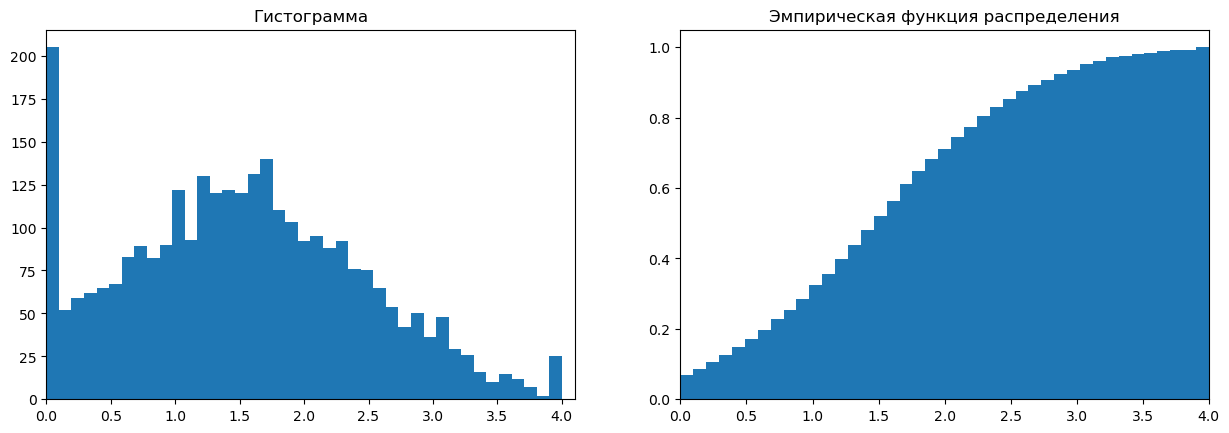

In [11]:
fig,axis = plt.subplots(1,2)
fig.set_figwidth(15)
axis[0].hist(df[cl],bins=41)
axis[1].hist(df[cl],bins=41,cumulative=True,density=True)
axis[0].set_title("Гистограмма")
axis[1].set_title("Эмпирическая функция распределения")
axis[0].set_xlim([0,4.1])
axis[1].set_xlim([0,4])
plt.show(fig)

## II. 
Проверить данные на нормальность, используя критерии:
1. Хи-квадрат (Реализовать самому, не используя библиотечные варианты!!)
2. Ассиметрии и эксцесса

In [13]:
def chi_square_test(sample, bins):
    observed, bin_edges = np.histogram(sample, bins=bins)
    mu, sigma = np.mean(sample), np.std(sample, ddof=1)
    cdf_vals = stats.norm.cdf(bin_edges, loc=mu, scale=sigma)
    expected = len(sample) * np.diff(cdf_vals)
    chi2 = np.sum((observed - expected) ** 2 / expected)
    df = bins - 1
    p_value = 1 - stats.chi2.cdf(chi2, df)
    return chi2, p_value

chi2_val, chi2_p = chi_square_test(df[cl], bins=40)
print("Хи-квадрат:", chi2_val, "p-value:", chi2_p)

Хи-квадрат: 2453.7844984998274 p-value: 0.0


In [14]:
def skew_kurtosis_test(sample):
    n = len(sample)
    skew = stats.skew(sample)
    kurt = stats.kurtosis(sample)
    z_skew = skew / (6/n)
    z_kurt = kurt / (24/n)
    return z_skew, z_kurt

data = df[cl]
z_skew, z_kurt = skew_kurtosis_test(data)
print("Z-асимметрия:", z_skew)
print("Z-эксцесс:", z_kurt)

Z-асимметрия: 129.44064736778057
Z-эксцесс: -62.42196674700418


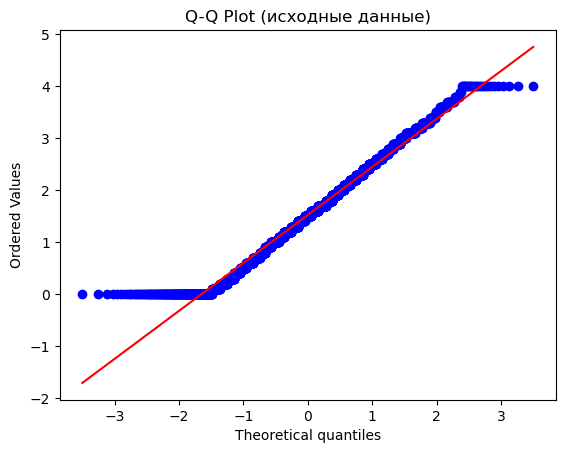

In [15]:
stats.probplot(data, dist="norm", plot=plt)
plt.title("Q-Q Plot (исходные данные)")
plt.show()

Нулевая гипотиза о нормальности распределения выборки была отвергнута в обоих тестах.

Также по Q-Q графику видно, что в общем распределение очегь близко к нормальному, за исключением концов

## III. 
Используя техники обработки данных, постарайтесь привести данные к нормальному распределению.  Например, с помощью:
1. Удаление, усечение выбросов
2. Стандартизация, нормировка
3. Логарифмирование и т.п.

In [18]:
data = df[cl]
filtered = data[(data >= data.quantile(0.07)) & (data <= data.quantile(0.95))]
filtered = (filtered - np.mean(filtered)) / np.std(filtered, ddof=1)


===== После обработки =====
Среднее: -4.8878269610334824e-17
Дисперсия: 0.9996230682246465
Мода: 0.21443169419279223
Медиана: -0.04706556376789633
Квантили (0.25,0.5,0.75): [-0.70080871 -0.04706556  0.73742621]
Эксцесс: -0.8085727724010501
Асимметрия: 0.08251604481994039
Интерквартильный размах: 1.4382349187837875


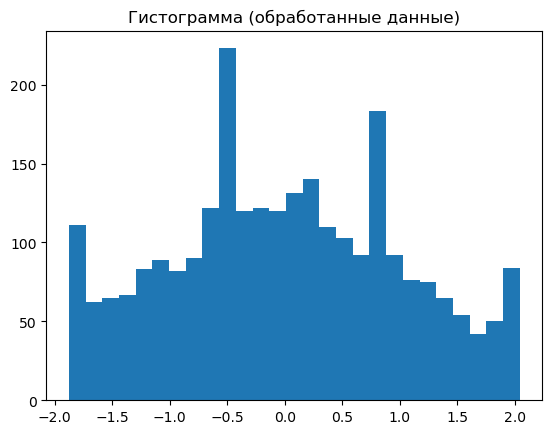

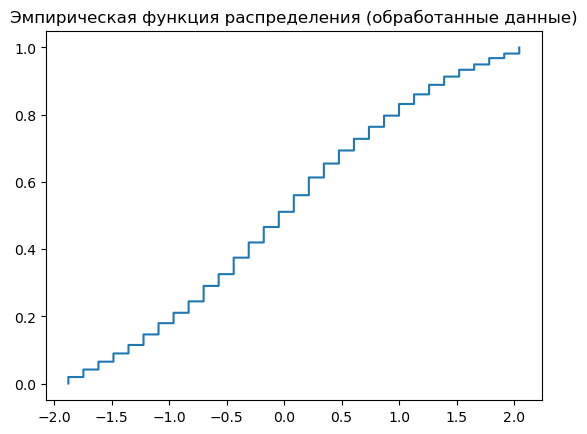

Хи-квадрат: 353.63653131646333 p-value: 0.0
Z-асимметрия: 36.485844484550306
Z-эксцесс: -89.3809818824994


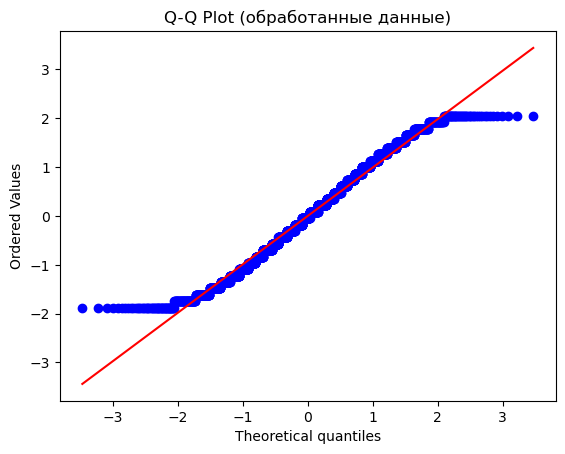

In [62]:
print("\n===== После обработки =====")
print("Среднее:", np.mean(filtered))
print("Дисперсия:", np.var(filtered))
print("Мода:", stats.mode(filtered, keepdims=True).mode[0])
print("Медиана:", np.median(filtered))
print("Квантили (0.25,0.5,0.75):", np.quantile(filtered, [0.25, 0.5, 0.75]))
print("Эксцесс:", stats.kurtosis(filtered))
print("Асимметрия:", stats.skew(filtered))
print("Интерквартильный размах:", stats.iqr(filtered))

plt.hist(filtered, bins=27
         ,)
plt.title("Гистограмма (обработанные данные)")
plt.show()

sorted_trans = np.sort(filtered)
y_vals = np.arange(1, len(sorted_trans) + 1) / len(sorted_trans)
plt.step(sorted_trans, y_vals, where="post")
plt.title("Эмпирическая функция распределения (обработанные данные)")
plt.show()

chi2_val2, chi2_p2 = chi_square_test(filtered, bins=10)
print("Хи-квадрат:", chi2_val2, "p-value:", chi2_p2)

z_skew2, z_kurt2 = skew_kurtosis_test(filtered)
print("Z-асимметрия:", z_skew2)
print("Z-эксцесс:", z_kurt2)

stats.probplot(filtered, dist="norm", plot=plt)
plt.title("Q-Q Plot (обработанные данные)")
plt.show()

## IV.
Сгруппируйте данные по столбцу 'School_Grade'. 

1. На одном графике постройте гистограммы для каждой группы.
2. Рассчитайте среднее, дисперсию внутри каждой группы

In [34]:
df["School_Grade"].value_counts()

School_Grade
12th    529
9th     526
7th     497
10th    487
8th     482
11th    479
Name: count, dtype: int64

Mean for 10th Grade - 1.45
Mean for 10th Grade - 0.86

Mean for 11th Grade - 1.51
Mean for 11th Grade - 0.79

Mean for 12th Grade - 1.52
Mean for 12th Grade - 0.94

Mean for 7th Grade - 1.55
Mean for 7th Grade - 0.78

Mean for 8th Grade - 1.54
Mean for 8th Grade - 0.96

Mean for 9th Grade - 1.57
Mean for 9th Grade - 0.88



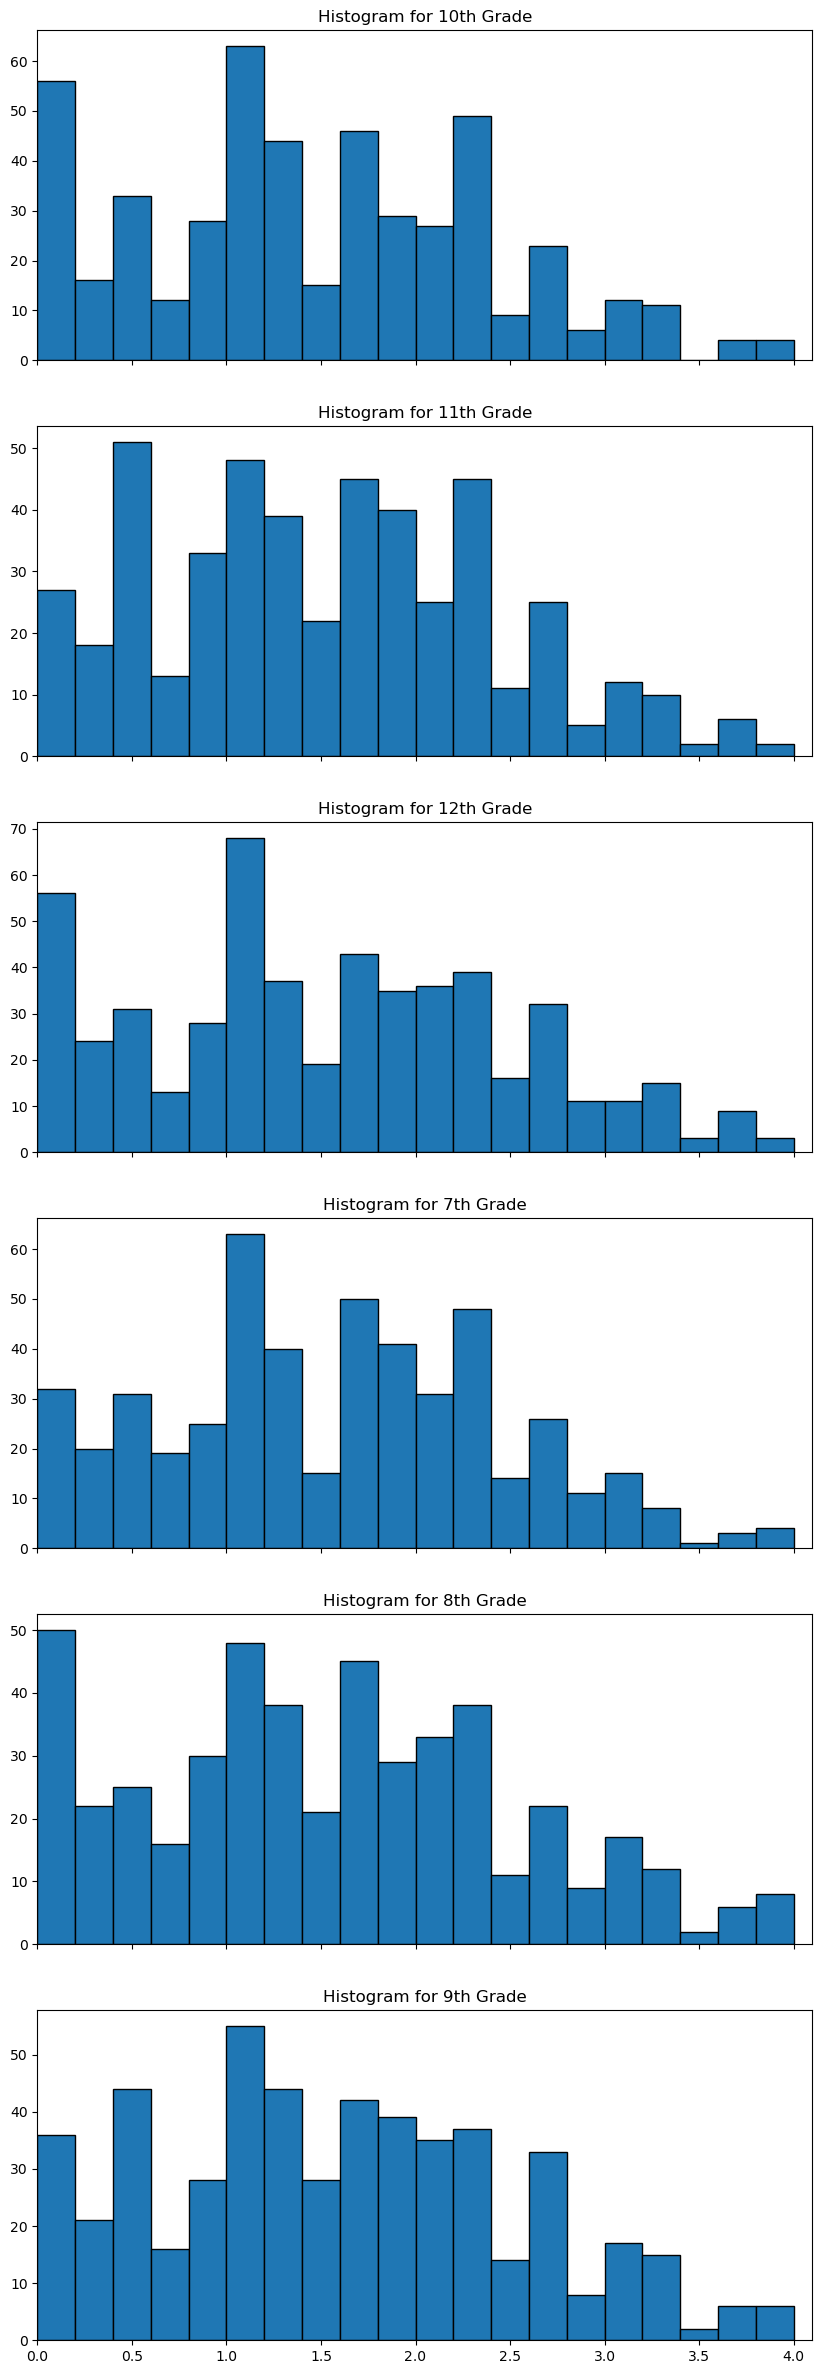

In [66]:
fig, axis = plt.subplots(len(df["School_Grade"].unique()),1,sharex=True,figsize=(10, 30))
for i,val in enumerate(df["School_Grade"].sort_values().unique()):
    data = df.query("School_Grade==@val")[cl]
    axis[i].hist(data, bins=20,edgecolor='black')
    axis[i].set_title(f"Histogram for {val} Grade")
    axis[i].set_xlim([0,4.1])
    print(f"Mean for {val} Grade - {data.mean():.2f}")
    print(f"Mean for {val} Grade - {data.var():.2f}\n")